In [1]:
# scikit-leanrとTensorflowによる機会学習を参考に

In [2]:
import os
import copy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns;sns.set()
%matplotlib inline
os.getcwd()

'C:\\home\\myproj\\interpretable-machine-learning\\LinearRegression\\FeatureImportance'

In [3]:
data_dir = '../../data/bike'
day_file = 'day.csv'
hour_file = 'hour.csv'

In [4]:
df_day = pd.read_csv(os.path.join(data_dir, day_file))
# headにすることで先頭だけ確認できる。
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# データの情報をざっくり得る。
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


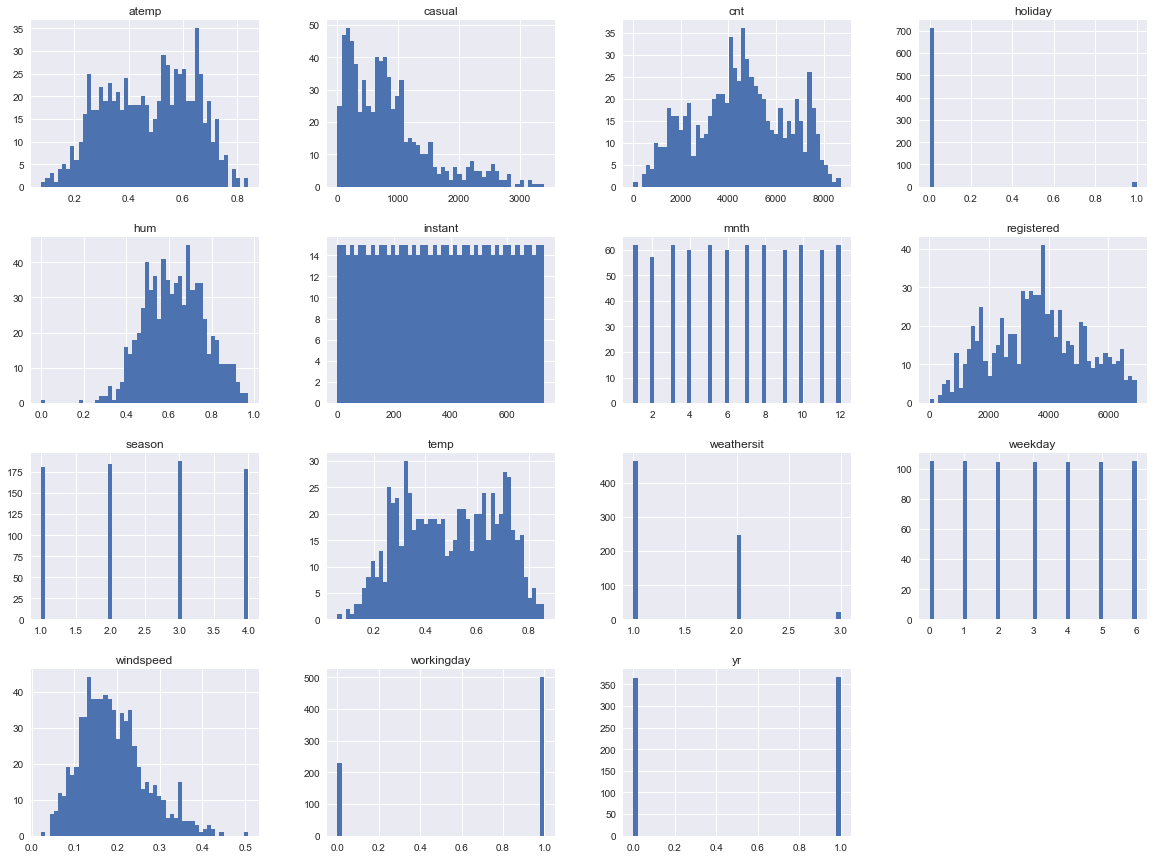

In [6]:
# データの分布を見る
df_day.hist(bins=50, figsize=(20, 15))
plt.show()


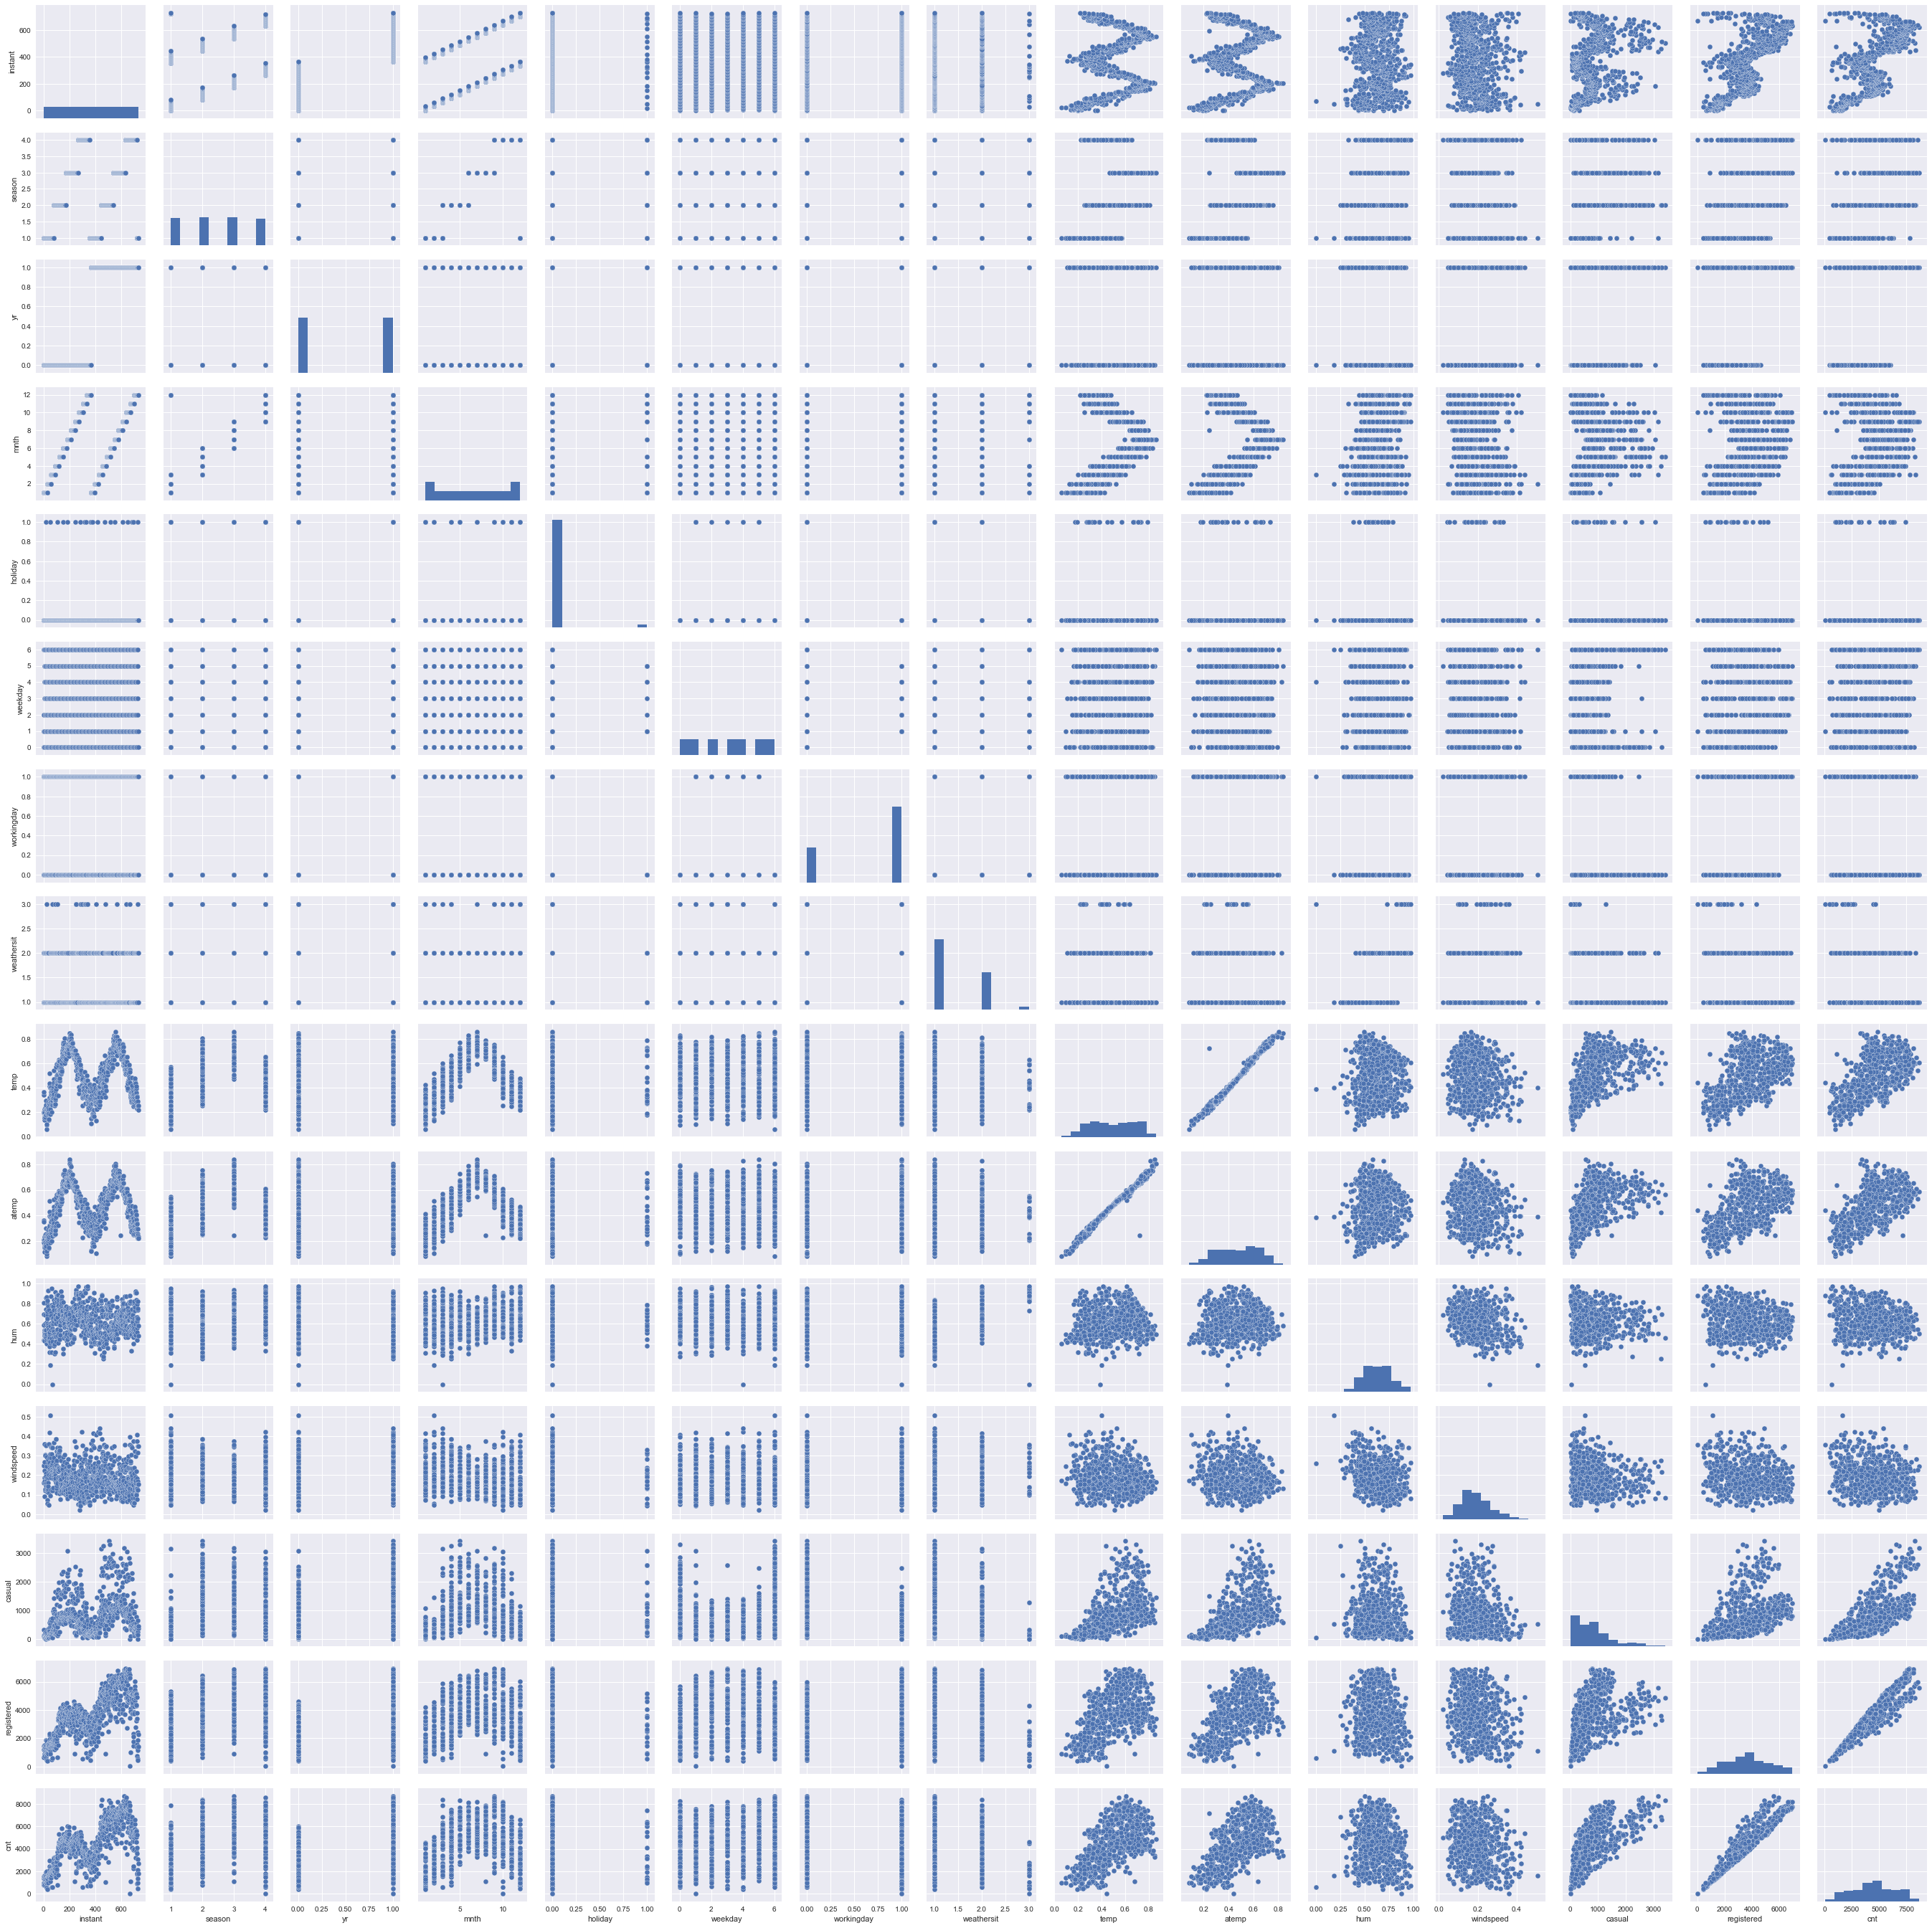

In [7]:
# データの相関を見る
sns.pairplot(df_day);
plt.show()

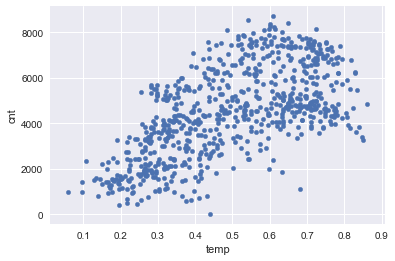

In [8]:
# データの相関を可視化
df_day.plot(kind="scatter", x="temp", y="cnt")

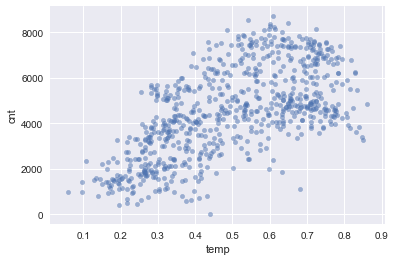

In [9]:
# データの相関を可視化　その2
df_day.plot(kind="scatter", x="temp", y="cnt", alpha=0.5)

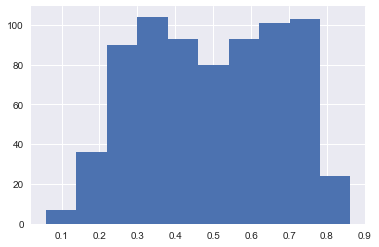

In [10]:
# 単純に分布を見る
df_day["temp"].hist()

In [11]:
# 相関を取る
corr_matrix = df_day.corr()

In [12]:
corr_matrix["cnt"].sort_values(ascending=False)

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64

In [24]:
# カテゴリーをワンホットに
X_season = df_day["season"]
encoder = OneHotEncoder(encoding='onehot')
X_season_encoded, Xseason_cat = X_season.factorize()
X_season_1hot = encoder.fit_transform(X_season_encoded.reshape(-1, 1))



Int64Index([1, 2, 3, 4], dtype='int64')

## データフローパイプラインを作る
ちょっと面倒なきがしてきた

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, Y=None):
        return self
    
    def transform(self, X):
        return X[self,attribute_names].values
    

## こっち
https://ensekitt.hatenablog.com/entry/2018/02/05/200000

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
